## insurance TCR projects


### importing packages

In [15]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



### down;oading and exploring data

In [16]:
insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
insurance['sex'] = insurance['sex'].apply({'male':0,      'female':1}.get) 
insurance['smoker'] = insurance['smoker'].apply({'yes':1, 'no':0}.get)
insurance['region'] = insurance['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


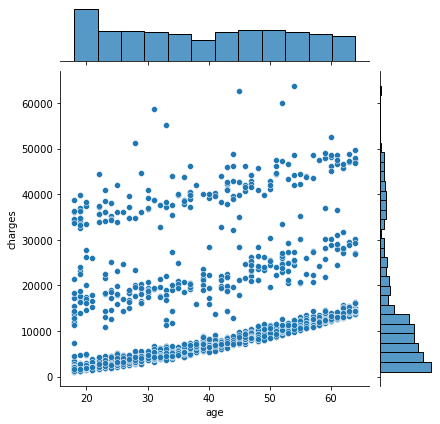

In [18]:
sns.jointplot(x=insurance['age'],y=insurance['charges'])


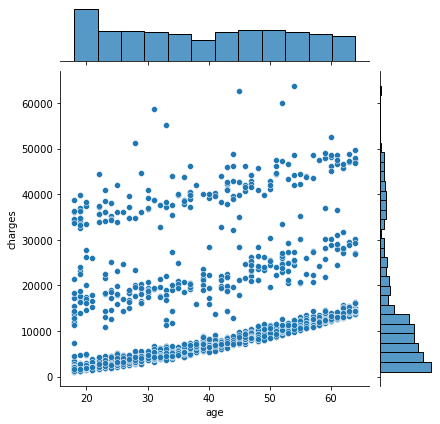

In [19]:
sns.jointplot(x=insurance['age'],y=insurance['charges'])

### preparing for training 

In [20]:
X = insurance[['age', 'sex', 'bmi', 'children','smoker','region']]
y = insurance['charges']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


### prediction algorithm and training model

In [22]:
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
predictions[0:5]

array([ 5928.43486273,  4301.83757793, 38757.86087454, 28076.40673778,
        9388.55785202])

### making predicton 

Text(0, 0.5, 'Predicted Y')

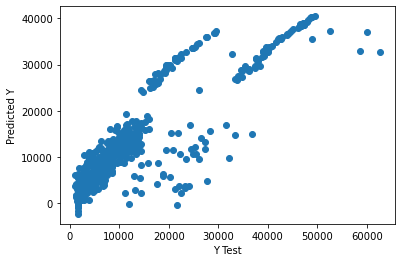

In [23]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### test case and generate a predicted result

In [24]:
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 45.50,
        'children' : 4,
        'smoker' : 1,
        'region' : 3}
index = [1]
suraj_df = pd.DataFrame(data,index)
suraj_df

,age,sex,bmi,children,smoker,region
1,40,1,45.5,4,1,3


In [25]:
prediction_suraj = model.predict(suraj_df)
print("Medical Insurance cost for suraj is : ",prediction_suraj)

Medical Insurance cost for suraj is :  [38355.84159872]
